In [1]:
####### Run a simple analysis of terrain around a selected location

# Step 1: Sign up for a Google Earth Engine Account here:
# https://earthengine.google.com/signup/

# you will use this to authenticate your account with GEE to run the script and
# utilize GEE layers

# Step 2: Setup a local conda environment on your machine to run Python and GEE

# Step 3: Activate that local conda environment (e.g. conda activate gee)

# Step 4: Install python, jupyterlab, matplotlib, geemap, earthengine-api and pandas in your conda environment
# https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html

# Step 5: Launch jupyter-lab and open the Ipython script

# Step 6: Run through the tutorial script

In [2]:
# get any missing modules
! pip install --quiet numpy matplotlib earthengine-api geemap pandas 

In [3]:
# setup modules
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
import pandas as pd
import sys,os,os.path,tempfile

# spatial modules
import ee
#import geemap # currently not using as colorbars dont load properly in google collab
import geemap.colormaps as cm
import geemap.foliumap as geemap # use folium instead so coloramps work on goolge collab
#import geemap as geemap
#https://geemap.org/notebooks/geemap_and_folium/
#https://geemap.org/notebooks/49_colorbar/#categorical-colorbar
    
import warnings
warnings.filterwarnings('ignore') #don't display warnings

In [4]:
## setup output. defined dir or system temp dir
output_dir=os.path.expanduser(os.path.join(tempfile.gettempdir(),'uas_output'))

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print(" ")
print("****** Temporary Output Folder ******")
print("****** Note: In Google Collab, use the dir navigation tool on the left of the screen ******")
print(output_dir)

 
****** Temporary Output Folder ******
****** Note: In Google Collab, use the dir navigation tool on the left of the screen ******
/var/folders/xp/h3k9vf3n2jx181ts786_yjrn9c2gjq/T/uas_output


In [ ]:
##### initialize ee API  - you need to authenticate with GEE and initialize

## Trigger the authentication flow. You only need to do this once while running notebook
ee.Authenticate()

## After inserting the API key initialize GEE
ee.Initialize()

In [6]:
##### Link to Example Cloud Optimized GeoTiffs (COGs) located in a Google Cloud Storage "bucket"
## RGB datasets
URL = 'gs://bnl_uas_data/NGEEArctic_UAS_Kougarok_20180725_Flight6_RGB_cog.tif'
kg_rgb_image = geemap.load_GeoTIFF(URL)
kg_RGB_imageVisParam = {"opacity":1,"bands":["B0","B1","B2"],
                    "min":-4.063213446967957,"max":85.22120105681381,
                     "gamma":1};
URL = 'gs://bnl_uas_data/NGEEArctic_UAS_Council_20180722_Flight3_RGB_cog.tif'
counc_rgb_image = geemap.load_GeoTIFF(URL)
counc_RGB_imageVisParam = {"opacity":1,"bands":["B0","B1","B2"],
                    "min":0,"max":190,
                     "gamma":1};
URL = 'gs://bnl_uas_data/NGEEArctic_UAS_Teller_20180723_Flight5_RGB_cog.tif'
tell_rgb_image = geemap.load_GeoTIFF(URL)
tell_RGB_imageVisParam = {"opacity":1,"bands":["B0","B1","B2"],
                    "min":0,"max":190,
                     "gamma":1};

In [7]:
##### Create a simple map displaying an RGB UAS image (Yang et al., 2021)
# center map over the Council Study Site
uas_map = geemap.Map(center=[64.857595,-163.693854], zoom=17);
uas_map.addLayer(counc_rgb_image, counc_RGB_imageVisParam, 'UAS_Council_20180722_Flight3_RGB')
uas_map

In [8]:
##### Create a simple map displaying an RGB UAS image (Yang et al., 2021)
# center map over the Kougarok study site
uas_map = geemap.Map(center=[65.164354,-164.823043], zoom=17);
uas_map.addLayer(kg_rgb_image, kg_RGB_imageVisParam, 'UAS_Kougarok_20180725_Flight6_RGB')
uas_map

In [9]:
##### Create a simple map displaying an RGB UAS image (Yang et al., 2022)
# center map over the Teller Study Site
uas_map = geemap.Map(center=[64.727368,-165.944388], zoom=17);
uas_map.addLayer(tell_rgb_image, tell_RGB_imageVisParam, 'UAS_Kougarok_20180725_Flight6_RGB')
uas_map

In [10]:
### Open spectrometer data
kg_pt_refl_data = pd.read_csv('https://storage.googleapis.com/bnl_uas_data/NGEEArctic_Seward_Osprey_Kougarok_20180725_Flight6_Spectra.csv')
kg_pt_refl_data.head()

counc_pt_refl_data = pd.read_csv('https://storage.googleapis.com/bnl_uas_data/NGEEArctic_Seward_Osprey_Council_20180722_Flight3_Spectra.csv')
counc_pt_refl_data.head()

tell_refl_data = pd.read_csv('https://storage.googleapis.com/bnl_uas_data/NGEEArctic_Seward_Osprey_Teller_20180723_Flight5_Spectra.csv')
tell_refl_data.head()

,Site,Data_Acquisition_Date_UTC,Data_Acquisition_Time_UTC,Longitude_DD,Latitude_DD,Altitude_HAE_Meter,Heading_DD,Yaw_DD,Pitch_DD,Roll_DD,...,Wave_891,Wave_892,Wave_893,Wave_894,Wave_895,Wave_896,Wave_897,Wave_898,Wave_899,Wave_900
0,Seward_Teller,20180724,01:36:34.597,-165.941894,64.726846,155.74,211,-2.588417,0.003813,0.094574,...,0.206341,0.203793,0.197310,0.190924,0.187493,0.190054,0.196965,0.208032,0.223637,0.244251
1,Seward_Teller,20180724,01:36:36.964,-165.942081,64.726871,155.30,244,-2.003957,-0.138340,-0.023214,...,0.181686,0.183659,0.186172,0.189471,0.191100,0.192978,0.195101,0.197344,0.199695,0.202232
2,Seward_Teller,20180724,01:36:38.984,-165.942270,64.726904,155.08,255,-1.828605,-0.125611,-0.022688,...,0.213188,0.213578,0.209645,0.203778,0.202160,0.202853,0.204743,0.208012,0.213033,0.220088
3,Seward_Teller,20180724,01:36:40.783,-165.942449,64.726938,154.87,261,-1.714437,-0.123261,-0.054747,...,0.193918,0.195769,0.194631,0.192731,0.191806,0.191733,0.191881,0.192406,0.193516,0.195393
4,Seward_Teller,20180724,01:36:42.391,-165.942634,64.726974,154.99,257,-1.784147,-0.117202,-0.059742,...,0.190479,0.186944,0.179766,0.175019,0.172994,0.175144,0.181057,0.190586,0.203808,0.220868


In [11]:
#### Subset the spectra
kg_pt_refl_data = kg_pt_refl_data.loc[:,'Wave_450':'Wave_850']
kg_pt_refl_data.head()

counc_pt_refl_data = counc_pt_refl_data.loc[:,'Wave_450':'Wave_850']
counc_pt_refl_data.head()

tell_refl_data = tell_refl_data.loc[:,'Wave_450':'Wave_850']
tell_refl_data.head()

,Wave_450,Wave_451,Wave_452,Wave_453,Wave_454,Wave_455,Wave_456,Wave_457,Wave_458,Wave_459,...,Wave_841,Wave_842,Wave_843,Wave_844,Wave_845,Wave_846,Wave_847,Wave_848,Wave_849,Wave_850
0,0.017737,0.017747,0.017940,0.018421,0.018827,0.019020,0.018865,0.018628,0.018493,0.018384,...,0.204609,0.204741,0.204726,0.204032,0.203306,0.204060,0.207049,0.210410,0.212617,0.212469
1,0.016694,0.016448,0.016487,0.017045,0.017669,0.018166,0.018342,0.018290,0.018061,0.017776,...,0.188142,0.188146,0.189667,0.192694,0.195731,0.197937,0.199819,0.201423,0.202279,0.200469
2,0.026673,0.026368,0.026271,0.026797,0.027528,0.028222,0.028686,0.028974,0.029057,0.028961,...,0.193569,0.194126,0.196896,0.200135,0.203294,0.206610,0.209509,0.210317,0.208820,0.206493
3,0.019271,0.018939,0.018870,0.019388,0.020074,0.020685,0.021051,0.021221,0.021134,0.020892,...,0.193816,0.197335,0.199122,0.199124,0.197957,0.197452,0.198403,0.199988,0.201917,0.202128
4,0.023578,0.023386,0.023382,0.023812,0.024308,0.024731,0.024878,0.024846,0.024829,0.024809,...,0.180428,0.181859,0.184909,0.187843,0.189143,0.188853,0.188757,0.189147,0.187641,0.185073


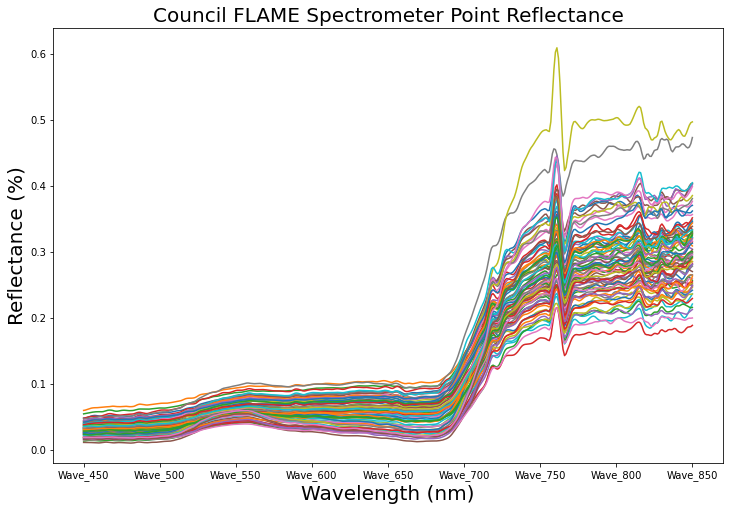

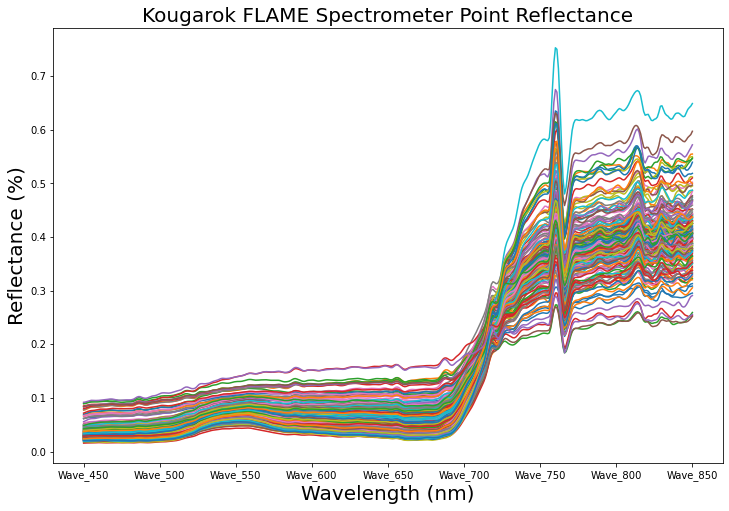

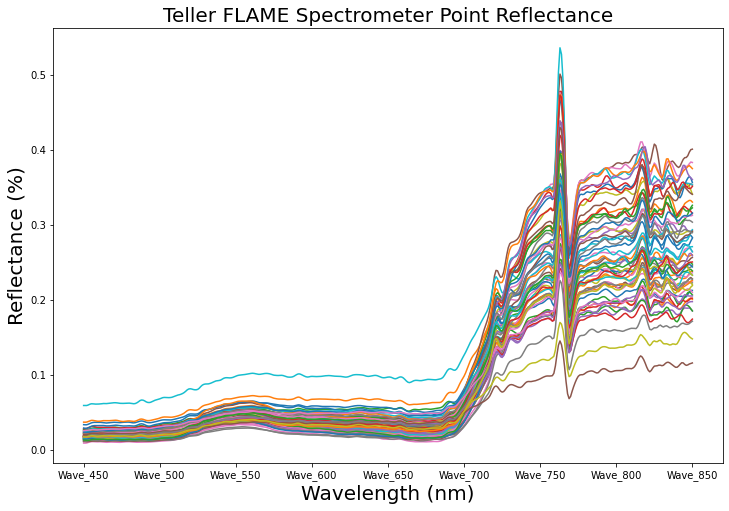

In [13]:
#### Plot the spectra
fig = pl.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
counc_pt_refl_data.T.plot(ax=ax, kind='line')
ax.get_legend().remove()
ax.set_title('Council FLAME Spectrometer Point Reflectance', size=20)
ax.set_xlabel('Wavelength (nm)', size=20)
ax.set_ylabel('Reflectance (%)', size=20)

# save to PNG file
png_file = os.path.join(output_dir, 'Council_FLAME_Spectrometer_Reflectance.png')
fig.figure.savefig(png_file)

fig = pl.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
kg_pt_refl_data.T.plot(ax=ax, kind='line')
ax.get_legend().remove()
ax.set_title('Kougarok FLAME Spectrometer Point Reflectance', size=20)
ax.set_xlabel('Wavelength (nm)', size=20)
ax.set_ylabel('Reflectance (%)', size=20)

# save to PNG file
png_file = os.path.join(output_dir, 'Kougarok_FLAME_Spectrometer_Reflectance.png')
fig.figure.savefig(png_file)

fig = pl.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
tell_refl_data.T.plot(ax=ax, kind='line')
ax.get_legend().remove()
ax.set_title('Teller FLAME Spectrometer Point Reflectance', size=20)
ax.set_xlabel('Wavelength (nm)', size=20)
ax.set_ylabel('Reflectance (%)', size=20)

# save to PNG file
png_file = os.path.join(output_dir, 'Teller_FLAME_Spectrometer_Reflectance.png')
fig.figure.savefig(png_file)

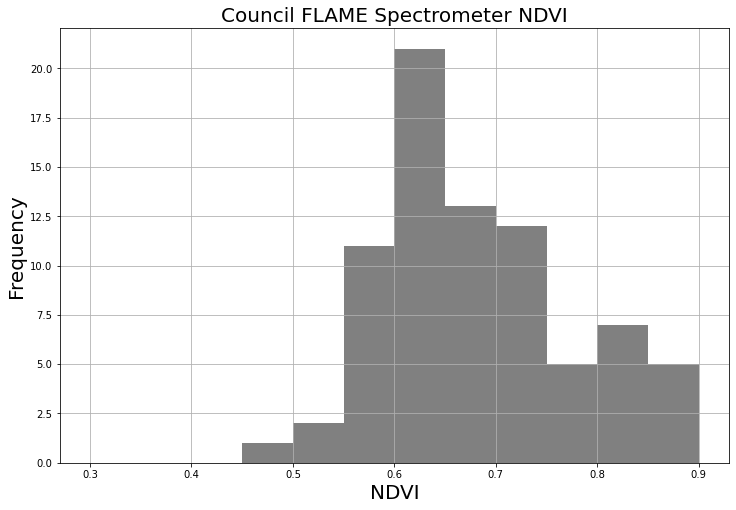

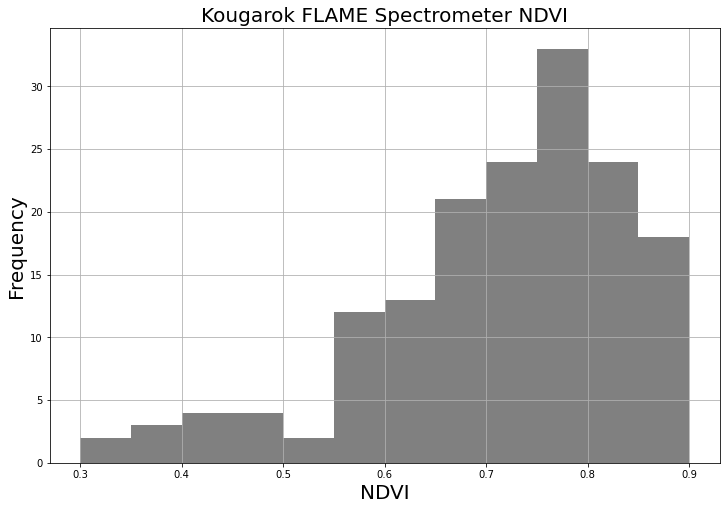

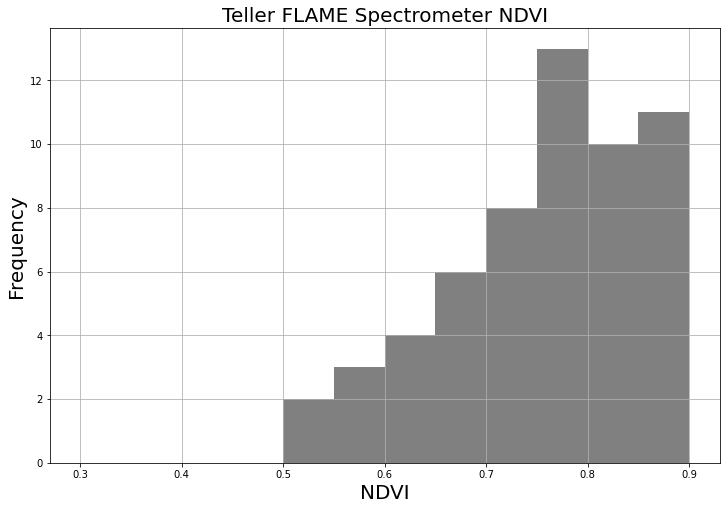

In [16]:
##### Create NDVI histograms from reflectance data

# Council
counc_ndvi = counc_pt_refl_data.loc[:,'Wave_830'].subtract(counc_pt_refl_data.loc[:,'Wave_655']) / \
counc_pt_refl_data.loc[:,'Wave_830'].add(counc_pt_refl_data.loc[:,'Wave_655'])
counc_ndvi

fig = pl.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
hist = counc_ndvi.hist(bins=12, range=[0.3, 0.9], facecolor='gray', align='mid')
ax.set_title('Council FLAME Spectrometer NDVI', size=20)
ax.set_xlabel('NDVI', size=20)
ax.set_ylabel('Frequency', size=20)

# save to PNG file
png_file = os.path.join(output_dir, 'Council_FLAME_Spectrometer_NDVI.png')
fig.figure.savefig(png_file)

# Kougarok
kg_ndvi = kg_pt_refl_data.loc[:,'Wave_830'].subtract(kg_pt_refl_data.loc[:,'Wave_655']) / \
kg_pt_refl_data.loc[:,'Wave_830'].add(kg_pt_refl_data.loc[:,'Wave_655'])
kg_ndvi

fig = pl.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
hist = kg_ndvi.hist(bins=12, range=[0.3, 0.9], facecolor='gray', align='mid')
ax.set_title('Kougarok FLAME Spectrometer NDVI', size=20)
ax.set_xlabel('NDVI', size=20)
ax.set_ylabel('Frequency', size=20)
# save to PNG file

png_file = os.path.join(output_dir, 'Kougarok_FLAME_Spectrometer_NDVI.png')
fig.figure.savefig(png_file)

# Teller
tell_ndvi = tell_refl_data.loc[:,'Wave_830'].subtract(tell_refl_data.loc[:,'Wave_655']) / \
tell_refl_data.loc[:,'Wave_830'].add(tell_refl_data.loc[:,'Wave_655'])
tell_ndvi

fig = pl.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
hist = tell_ndvi.hist(bins=12, range=[0.3, 0.9], facecolor='gray', align='mid')
ax.set_title('Teller FLAME Spectrometer NDVI', size=20)
ax.set_xlabel('NDVI', size=20)
ax.set_ylabel('Frequency', size=20)

png_file = os.path.join(output_dir, 'Teller_FLAME_Spectrometer_NDVI.png')
fig.figure.savefig(png_file)

In [17]:
##### Overly spec points - first create a new ee.Feature object
# repull csv data into a geemap spatial object (ee.Featurecollection)
in_csv = 'https://storage.googleapis.com/bnl_uas_data/NGEEArctic_Seward_Osprey_Kougarok_20180725_Flight6_Spectra.csv'
kg_pt_refl_data_gee = geemap.xy_to_points(in_csv,latitude='Latitude_DD',longitude='Longitude_DD')

in_csv = 'https://storage.googleapis.com/bnl_uas_data/NGEEArctic_Seward_Osprey_Council_20180722_Flight3_Spectra.csv'
counc_pt_refl_data_gee = geemap.xy_to_points(in_csv,latitude='Latitude_DD',longitude='Longitude_DD')

in_csv = 'https://storage.googleapis.com/bnl_uas_data/NGEEArctic_Seward_Osprey_Teller_20180723_Flight5_Spectra.csv'
tell_pt_refl_data_gee = geemap.xy_to_points(in_csv,latitude='Latitude_DD',longitude='Longitude_DD')

In [18]:
##### Compare UAS NDVI with Landsat 8
l8 = ee.ImageCollection('LANDSAT/LC08/C01/T1_8DAY_NDVI').filterDate('2018-07-01', '2018-09-10')
l8_ndvi = l8.select('NDVI');
#water = l8_ndvi.first().lt(0.5)
#mask = water.eq(1);

# Composite
# https://developers.google.com/earth-engine/guides/ic_composite_mosaic
l8_maxval_ndvi_composite = l8_ndvi.max();
#image = ee.Image(filtered.mosaic())

In [19]:
### Map Landsat 8 Maximum Value Composite with RGB UAS image
ndvi_palette = cm.get_palette('viridis', n_class=30)
ndviViz = {'min': 0.0, 'max': 1.0, 'palette': ndvi_palette, 'opacity': 1}
points = ee.Geometry.MultiPoint([[-164.825821,65.161551],[-165.949345,64.734663],
                                [-163.782806,64.865566]])
l8_ndvi_map = geemap.Map(center=[64.853606,-164.729004], zoom=9)
l8_ndvi_map.addLayer(l8_maxval_ndvi_composite, ndviViz, 'Landsat 8 NDVI')
l8_ndvi_map.add_colorbar(vis_params=ndviViz, label='Landsat 8 NDVI (-)')
l8_ndvi_map.addLayer(points, {'color': 'black', 'size': '50'}, "NGEE Sites")
l8_ndvi_map

In [20]:
#### Extract Landsat NDVI to file
print(output_dir)
l8_koug_maxndvi = os.path.join(output_dir, 'KG_Landsat8_NDVI_JulyAug2018.csv')
geemap.extract_values_to_points(kg_pt_refl_data_gee, l8_maxval_ndvi_composite, l8_koug_maxndvi, scale=1)
l8_koug_maxndvi

l8_counc_maxndvi = os.path.join(output_dir, 'Council_Landsat8_NDVI_JulyAug2018.csv')
geemap.extract_values_to_points(counc_pt_refl_data_gee, l8_maxval_ndvi_composite, l8_counc_maxndvi, scale=1)
l8_counc_maxndvi

l8_tell_maxndvi = os.path.join(output_dir, 'Teller_Landsat8_NDVI_JulyAug2018.csv')
geemap.extract_values_to_points(tell_pt_refl_data_gee, l8_maxval_ndvi_composite, l8_tell_maxndvi, scale=1)
l8_tell_maxndvi

/var/folders/xp/h3k9vf3n2jx181ts786_yjrn9c2gjq/T/uas_output
Generating URL ...
Please wait ...
Data downloaded to /var/folders/xp/h3k9vf3n2jx181ts786_yjrn9c2gjq/T/uas_output/KG_Landsat8_NDVI_JulyAug2018.csv
Generating URL ...
Please wait ...
Data downloaded to /var/folders/xp/h3k9vf3n2jx181ts786_yjrn9c2gjq/T/uas_output/Council_Landsat8_NDVI_JulyAug2018.csv
Generating URL ...
Please wait ...
Data downloaded to /var/folders/xp/h3k9vf3n2jx181ts786_yjrn9c2gjq/T/uas_output/Teller_Landsat8_NDVI_JulyAug2018.csv


'/var/folders/xp/h3k9vf3n2jx181ts786_yjrn9c2gjq/T/uas_output/Teller_Landsat8_NDVI_JulyAug2018.csv'

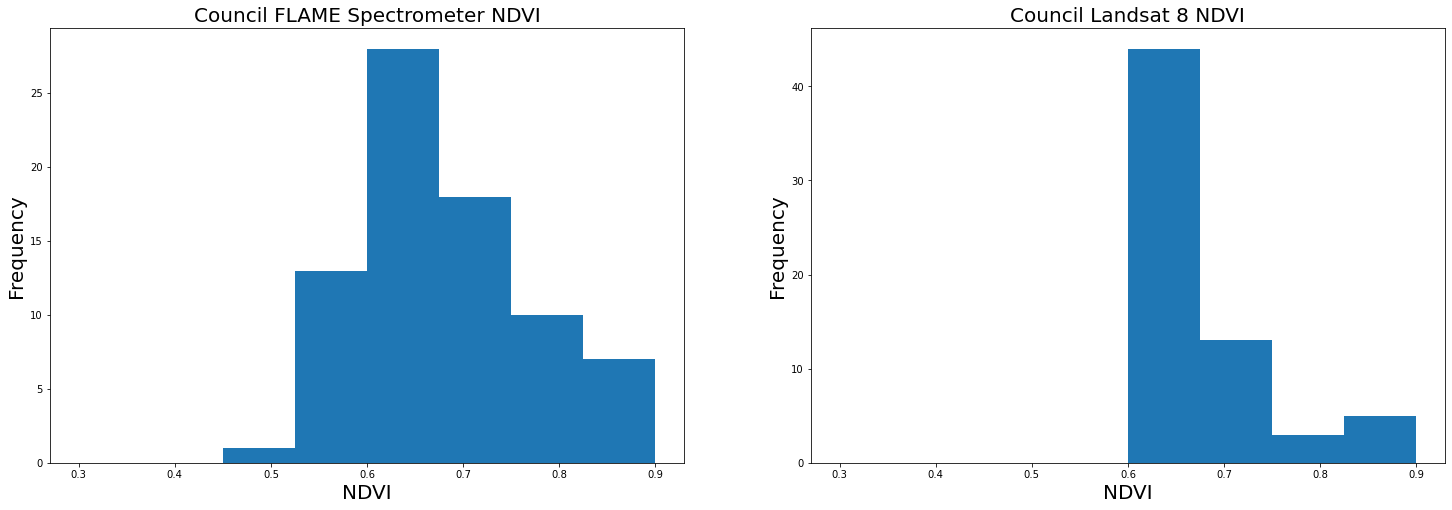

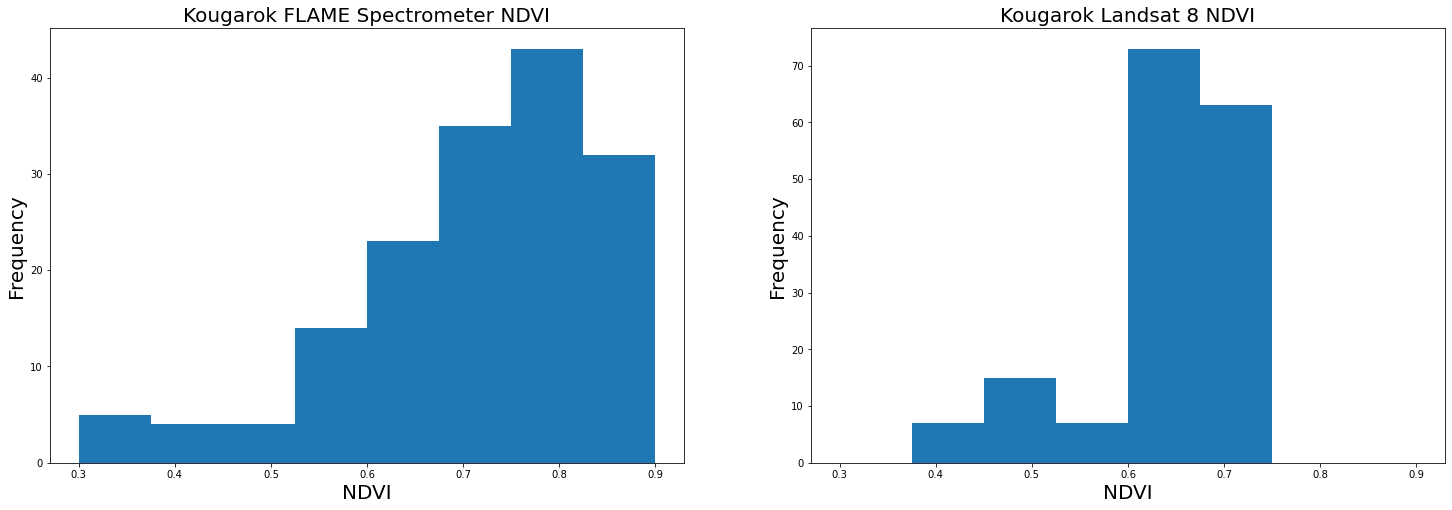

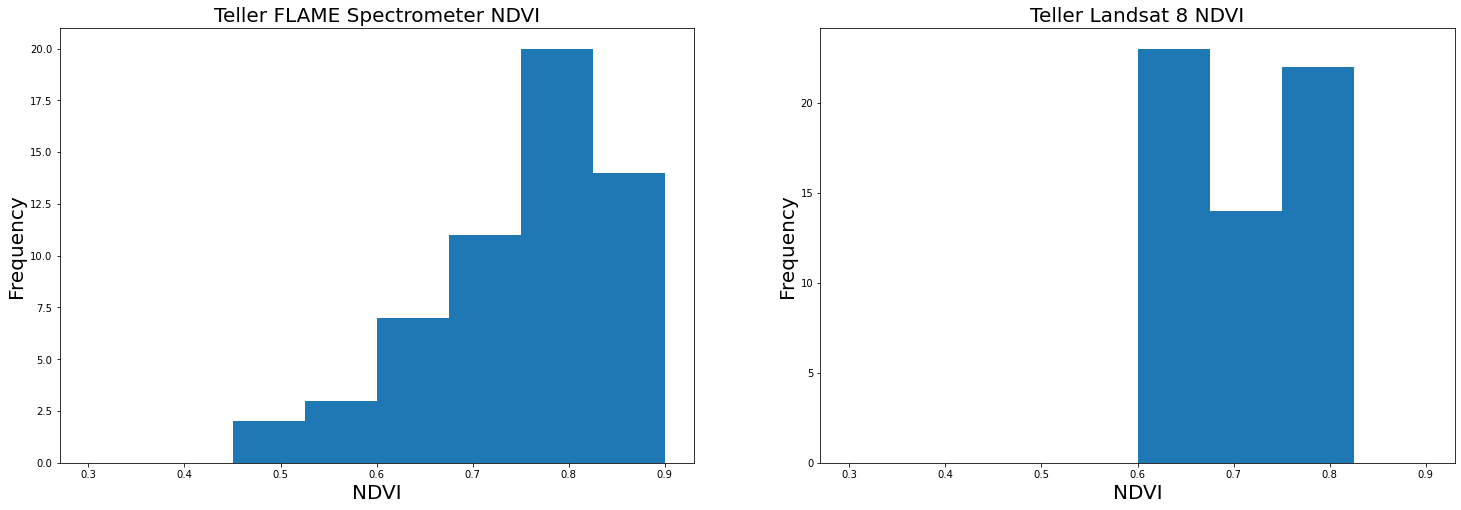

In [21]:
#### Compare UAS NDVI with a Landsat 8 Maximum Value Composite
counc_landsat8_ndvi_data = pd.read_csv(l8_counc_maxndvi)
counc_landsat8_ndvi_data = counc_landsat8_ndvi_data['first']

fig = pl.figure(figsize=(25, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.hist(counc_ndvi, bins=8, range=[0.3, 0.9], align='mid')
ax1.set_title('Council FLAME Spectrometer NDVI', size=20)
ax1.set_ylabel('Frequency', size=20)
ax1.set_xlabel('NDVI', size=20)
ax2.set_title('Council Landsat 8 NDVI', size=20)
ax2.hist(counc_landsat8_ndvi_data, bins=8, range=[0.3, 0.9], align='mid')
ax2.set_ylabel('Frequency', size=20)
ax2.set_xlabel('NDVI', size=20)

# save to PNG file
png_file = os.path.join(output_dir, 'Council_UAS_Landsat8_NDVI_Historgram.png')
fig.figure.savefig(png_file)

kg_landsat8_ndvi_data = pd.read_csv(l8_koug_maxndvi)
kg_landsat8_ndvi_data = kg_landsat8_ndvi_data['first']

fig = pl.figure(figsize=(25, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.hist(kg_ndvi, bins=8, range=[0.3, 0.9], align='mid')
ax1.set_title('Kougarok FLAME Spectrometer NDVI', size=20)
ax1.set_ylabel('Frequency', size=20)
ax1.set_xlabel('NDVI', size=20)
ax2.set_title('Kougarok Landsat 8 NDVI', size=20)
ax2.hist(kg_landsat8_ndvi_data, bins=8, range=[0.3, 0.9], align='mid')
ax2.set_ylabel('Frequency', size=20)
ax2.set_xlabel('NDVI', size=20)

# save to PNG file
png_file = os.path.join(output_dir, 'Kougarok_UAS_Landsat8_NDVI_Historgram.png')
fig.figure.savefig(png_file)

tell_landsat8_ndvi_data = pd.read_csv(l8_tell_maxndvi)
tell_landsat8_ndvi_data = tell_landsat8_ndvi_data['first']

fig = pl.figure(figsize=(25, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.hist(tell_ndvi, bins=8, range=[0.3, 0.9], align='mid')
ax1.set_title('Teller FLAME Spectrometer NDVI', size=20)
ax1.set_ylabel('Frequency', size=20)
ax1.set_xlabel('NDVI', size=20)
ax2.set_title('Teller Landsat 8 NDVI', size=20)
ax2.hist(tell_landsat8_ndvi_data, bins=8, range=[0.3, 0.9], align='mid')
ax2.set_ylabel('Frequency', size=20)
ax2.set_xlabel('NDVI', size=20)

# save to PNG file
png_file = os.path.join(output_dir, 'Teller_UAS_Landsat8_NDVI_Historgram.png')
fig.figure.savefig(png_file)

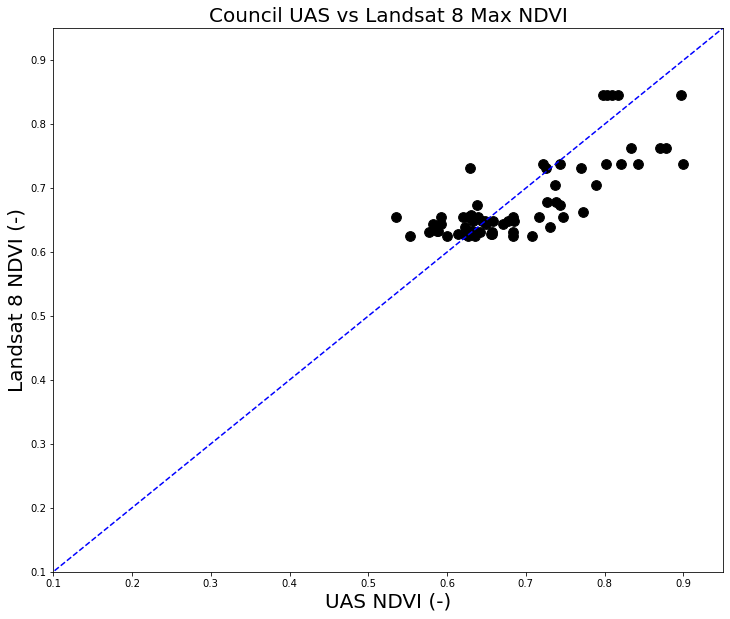

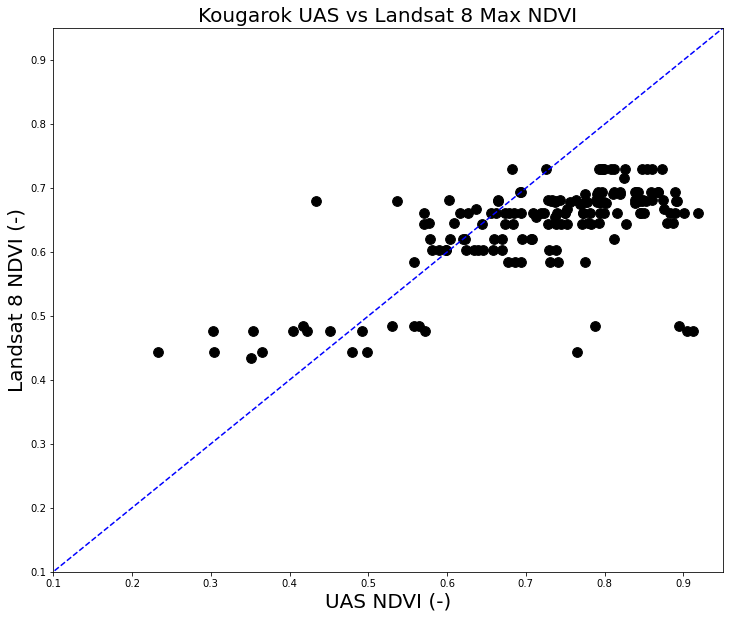

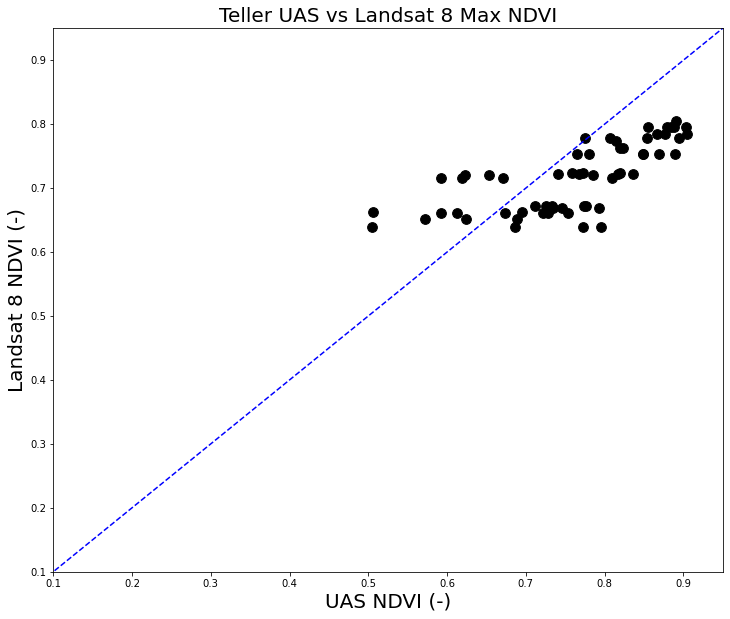

In [22]:
##### XY scatter plot - UAS NDVI vs Landsat 8
pl.figure(figsize=(12, 10))
pl.scatter(counc_ndvi, counc_landsat8_ndvi_data, marker='o', s=95, c="black")
pl.title('Council UAS vs Landsat 8 Max NDVI', size=20)
pl.xlabel("UAS NDVI (-)", size=20)
pl.ylabel("Landsat 8 NDVI (-)", size=20)
pl.xlim(0.1, 0.95)
pl.ylim(0.1, 0.95)
pl.plot([0, 1], [0, 1], 'k--', color = 'b')

# save to PNG file
png_file = os.path.join(output_dir, 'Council_UAS_Landsat8_NDVI_Scatterplot.png')
pl.savefig(png_file)

pl.figure(figsize=(12, 10))
pl.scatter(kg_ndvi, kg_landsat8_ndvi_data, marker='o', s=95, c="black")
pl.title('Kougarok UAS vs Landsat 8 Max NDVI', size=20)
pl.xlabel("UAS NDVI (-)", size=20)
pl.ylabel("Landsat 8 NDVI (-)", size=20)
pl.xlim(0.1, 0.95)
pl.ylim(0.1, 0.95)
pl.plot([0, 1], [0, 1], 'k--', color = 'b')

# save to PNG file
png_file = os.path.join(output_dir, 'Kougarok_UAS_Landsat8_NDVI_Scatterplot.png')
pl.savefig(png_file)

pl.figure(figsize=(12, 10))
pl.scatter(tell_ndvi, tell_landsat8_ndvi_data, marker='o', s=95, c="black")
pl.title('Teller UAS vs Landsat 8 Max NDVI', size=20)
pl.xlabel("UAS NDVI (-)", size=20)
pl.ylabel("Landsat 8 NDVI (-)", size=20)
pl.xlim(0.1, 0.95)
pl.ylim(0.1, 0.95)
pl.plot([0, 1], [0, 1], 'k--', color = 'b')

# save to PNG file
png_file = os.path.join(output_dir, 'Teller_UAS_Landsat8_NDVI_Scatterplot.png')
pl.savefig(png_file)